In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas
from scipy.interpolate import interp1d

load temperature data (table) using the Package Pandas <br>
annual average temperature in Florida from 1895 to 2017 <br>
https://www.ncdc.noaa.gov/cag/statewide/time-series/8/tavg/12/12/1895-2018?base_prd=true&firstbaseyear=1895&lastbaseyear=2000

In [3]:
# load data from Florida_temp_mean_1895_2017.csv using pandas

In [18]:
# show data

,Year,Temperature,Anomaly
0,1895,68.7,-1.4
1,1896,69.9,-0.2
2,1897,70.4,0.3
3,1898,70.1,0.0
4,1899,70.4,0.3
5,1900,69.9,-0.2
6,1901,68.0,-2.1
7,1902,69.9,-0.2
8,1903,69.0,-1.1
9,1904,69.3,-0.8


In [19]:
#show the first five rows

,Year,Temperature,Anomaly
0,1895,68.7,-1.4
1,1896,69.9,-0.2
2,1897,70.4,0.3
3,1898,70.1,0.0
4,1899,70.4,0.3


In [4]:
# get the 'Year' column and convert it into a numpy array
# save it in a variable called 'years'

array([1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905,
       1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916,
       1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017])

In [20]:
# get the 'Temperature' column and convert it into a numpy array
# save it in a variable called 'temps'

array([68.7, 69.9, 70.4, 70.1, 70.4, 69.9, 68. , 69.9, 69. , 69.3, 70. ,
       69.6, 70.5, 70.3, 70.2, 68.2, 71.3, 70. , 70. , 69.1, 69.1, 69.6,
       68.8, 69.8, 70.4, 68.9, 71. , 71. , 70.1, 69.4, 70.4, 69.3, 71.1,
       69.3, 70.7, 70.3, 69.9, 71. , 70.9, 69.8, 69.8, 70.1, 69.8, 70.2,
       70.6, 68.2, 69.8, 69.4, 69.5, 70.2, 70.7, 71.2, 70.3, 71.6, 71.6,
       70.3, 70.4, 70.3, 70.8, 70.1, 70.2, 69.9, 71. , 69. , 70.6, 70.3,
       70. , 69.8, 69.2, 70. , 70.2, 69. , 70.2, 68.6, 69. , 69.4, 70.4,
       70.9, 70.3, 70.9, 71.2, 69. , 69.4, 69.7, 69.9, 69.9, 69.3, 71.5,
       69.3, 70. , 70.8, 71.5, 70.2, 69.7, 71. , 72.5, 71.8, 70.3, 70.3,
       71.6, 70.8, 69.9, 71.1, 72.5, 71.2, 70.6, 70.9, 71.3, 70.9, 70.8,
       70.8, 71.4, 71.8, 70.8, 71.2, 69.2, 71.7, 71.9, 71.7, 70.6, 73.4,
       72.5, 72.7])

In [1]:
# handle missing values in the table
# see the pdf for a hint

In [2]:
# calculate the standard deviation 

In [3]:
# calculate the mean temperature

In [4]:
# use .iloc[row,col] to get an element in the table


In [5]:
# use .iloc to get a row of the table
# use .values to convert the row to a numpy array


In [6]:
# use .iloc to get a column of the table
# use .values to convert the column to a numpy array


### visualize the data using matplotlib

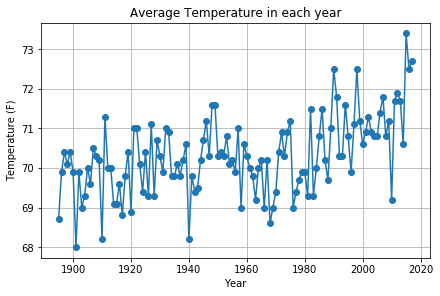

In [27]:
# plot the temperature history

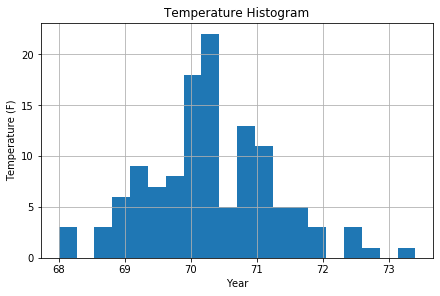

In [28]:
# show the histogram of the temperature values

smooth the data, so we can see the trend clearly ... <br>
convolution kernel = [0.2, 0.2, 0.2, 0.2] <br>
try to use the convolve function in numpy

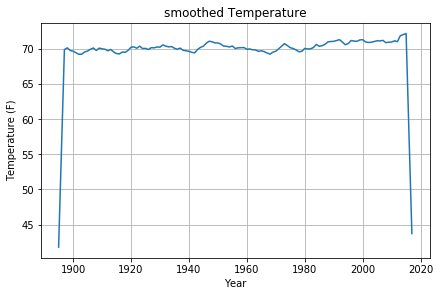

In [16]:
# smooth the temperature curve using moving average

np.convolve does not handle the start/end point very well <br>


In [40]:
import scipy
import scipy.ndimage
# use the convolve function in the module ndimage of the package scipy

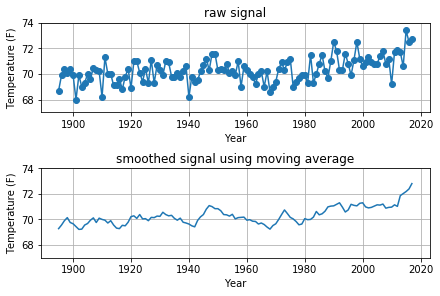

In [41]:
# plot both to show the differences

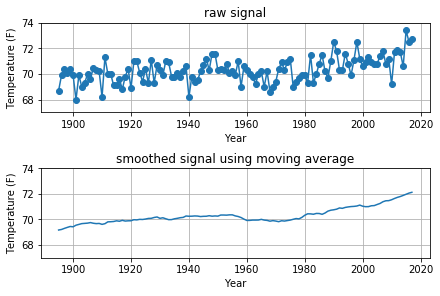

In [42]:
# use a larger kernel with 21 numbers
# plot results

In [19]:
# add a new column to the table, and it contains a 'Smoothed_signal'

,Year,Temperature,Anomaly,Smoothed_signal
0,1895,68.7,-1.4,41.80
1,1896,69.9,-0.2,55.82
2,1897,70.4,0.3,69.90
3,1898,70.1,0.0,70.14
4,1899,70.4,0.3,69.76
...,...,...,...,...
118,2013,71.7,1.6,71.86
119,2014,70.6,0.5,72.02
120,2015,73.4,3.3,72.18
121,2016,72.5,2.4,57.84


In [7]:
# save the new table (dataframe) to a .csv file